<a href="https://colab.research.google.com/github/mneochengrustno/Works/blob/AI/Test_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Посчитать

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("/content/Тестовое задание — Аналитик.xlsx")
df

,Дата создания тикета,Количество тикетов,СЛА
0,2022-01-01 06:33:34,1,0.0
1,2022-01-01 08:14:39,1,1.0
2,2022-01-01 09:00:31,1,1.0
3,2022-01-01 09:24:38,1,1.0
4,2022-01-01 09:49:39,1,1.0
...,...,...,...
282976,2024-12-31 19:02:45,1,1.0
282977,2024-12-31 19:15:46,1,1.0
282978,2024-12-31 20:37:15,1,1.0
282979,2024-12-31 20:37:38,1,1.0


In [ ]:
df['Дата создания тикета'] = pd.to_datetime(df['Дата создания тикета'], dayfirst=True)
df['Месяц'] = df['Дата создания тикета'].dt.to_period('M')
df['СЛА'] = df['СЛА'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

а) Кол-во новых тикетов за каждый месяц

In [ ]:
tickets_per_month = df.groupby('Месяц')['Количество тикетов'].sum()
tickets_per_month

,Количество тикетов
Месяц,
2022-01,4683
2022-02,6141
2022-03,6740
2022-04,6674
2022-05,5619
2022-06,5060
2022-07,4035
2022-08,4067
2022-09,4694


б) СЛА за каждый месяц

In [ ]:
sla_per_month = df.groupby('Месяц')['СЛА'].mean()
sla_per_month

,СЛА
Месяц,
2022-01,0.908183
2022-02,0.887661
2022-03,0.539997
2022-04,0.757204
2022-05,0.889148
2022-06,0.914280
2022-07,0.801946
2022-08,0.842657
2022-09,0.765369


### 2. Построить графики

а) Динамика кол-ва тикетов

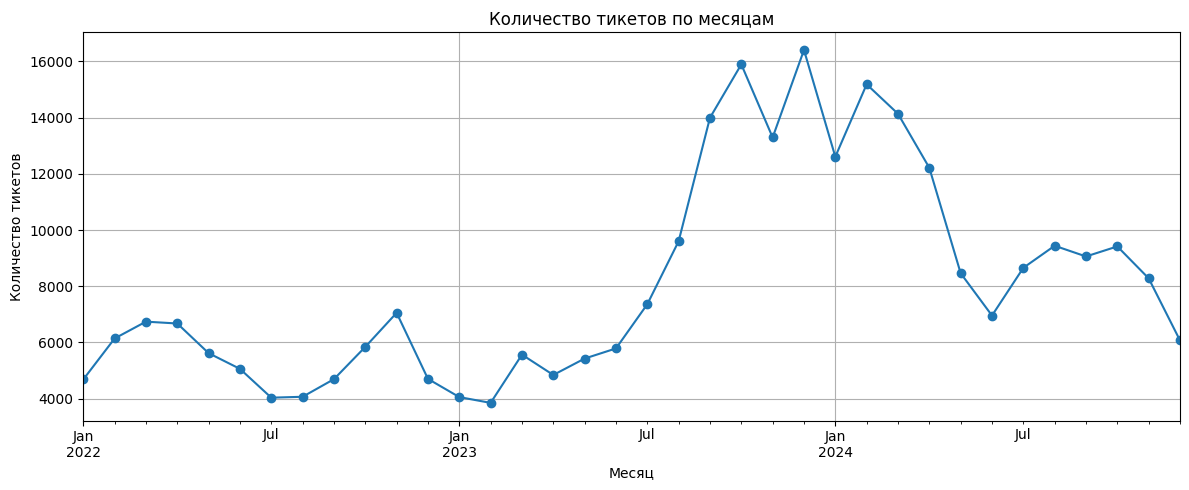

In [ ]:
plt.figure(figsize=(12, 5))
tickets_per_month.plot(marker='o')
plt.title("Количество тикетов по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество тикетов")
plt.grid(True)
plt.xticks()
plt.tight_layout()
plt.show()

б) Динамика СЛА

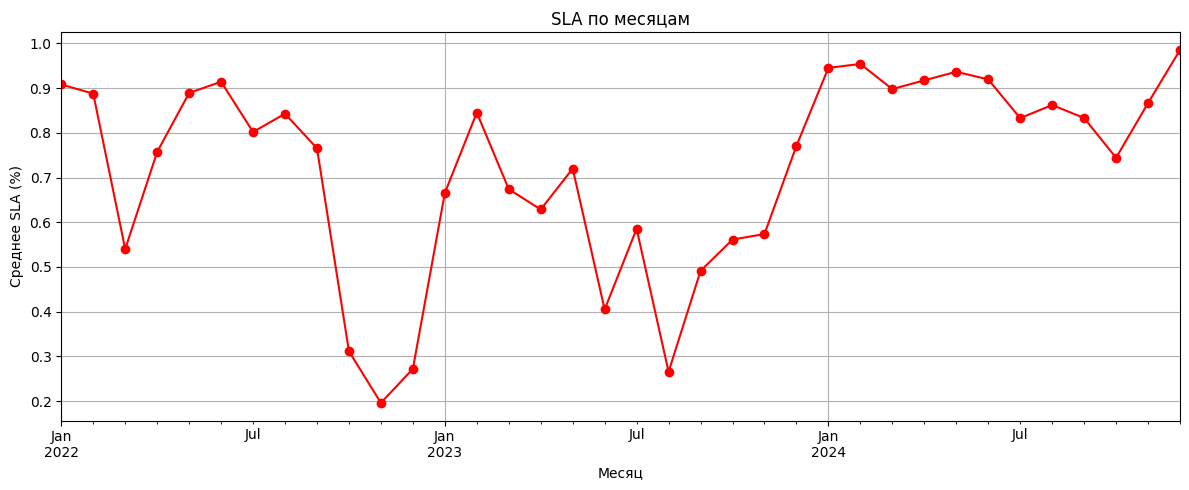

In [ ]:
plt.figure(figsize=(12, 5))
sla_per_month.plot(marker='o', color='r')
plt.title("SLA по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Среднее SLA (%)")
plt.grid(True)
plt.xticks()
plt.tight_layout()
plt.show()

### 3. Проанализировать

а-б) Как себя ведут графики количества тикетов по месяцам в разные года (2022-2024)

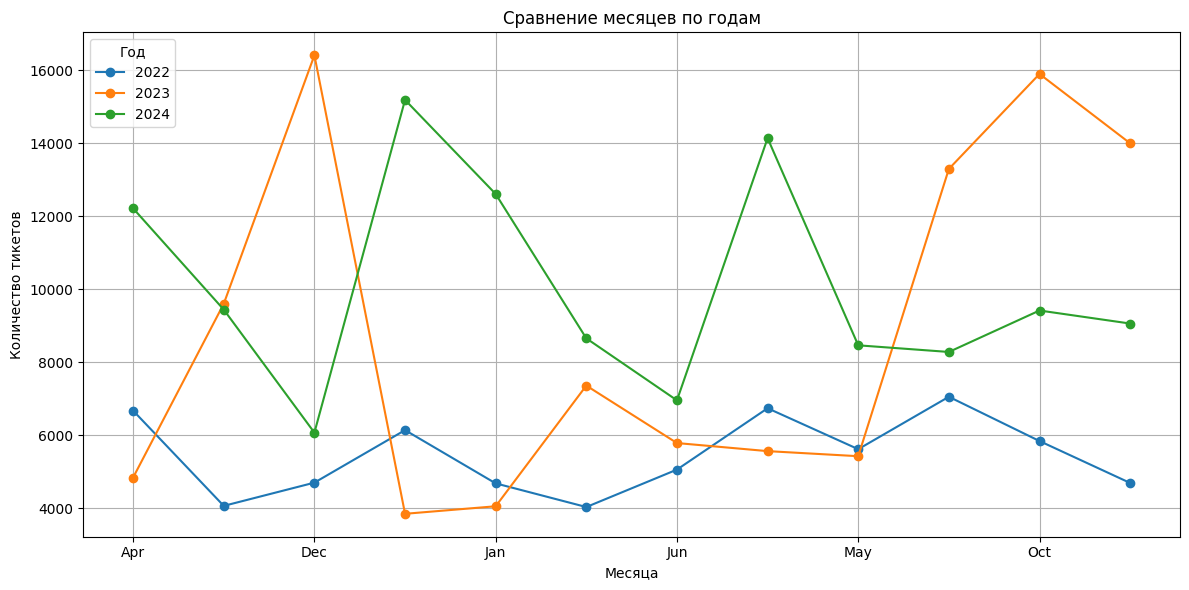

In [ ]:
df['Год'] = df['Дата создания тикета'].dt.year
df['Месяца'] = df['Дата создания тикета'].dt.strftime('%b')
monthly_avg = df.groupby(['Год', 'Месяца'])['Количество тикетов'].sum().unstack(0)
monthly_avg.plot(figsize=(12,6), marker='o')
plt.title("Сравнение месяцев по годам")
plt.ylabel("Количество тикетов")
plt.grid(True)
plt.tight_layout()
plt.show()

в) Корреляция между нагрузкой и СЛА

In [ ]:
monthly_data = df.groupby('Месяц').agg({'Количество тикетов': 'sum', 'СЛА': 'mean'})
correlation = monthly_data['Количество тикетов'].corr(monthly_data['СЛА'])
print(f"Корреляция между нагрузкой и СЛА: {correlation:.2f}")

Корреляция между нагрузкой и СЛА: 0.06
